<a href="https://colab.research.google.com/github/manisha-dhanuka/Recommendation-System/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [86]:
# Importing the drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# importing the packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# loading the data in colab:
df = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [89]:
#some basic info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [90]:
# shape of the data:
df.shape

(7787, 12)

In [91]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#Observation:

Thus, the data consists of 7787 entries and 12 columns, there are null values too in the data we need to get rid of that too.

In [92]:
# Converting date_added to datetime type:
df['date_added'] = pd.to_datetime(df['date_added'])

In [93]:
# Null values: 
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [94]:
# dropping those entries whose date added is not given:
df_new = df[df['date_added'].notna()].copy()

In [95]:
# creating a new column for added_year:
df_new['added_year'] = df_new['date_added'].apply( lambda x: int(x.year))

In [96]:
# checking if there is any error in data  in case of added dates
df_new[df_new['added_year']<df_new['release_year']]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
583,s584,TV Show,Arrested Development,NaN,"Jason Bateman, Portia de Rossi, Will Arnett, M...",United States,2018-05-29,2019,TV-MA,5 Seasons,TV Comedies,It's the Emmy-winning story of a wealthy famil...,2018
1025,s1026,TV Show,BoJack Horseman,NaN,"Will Arnett, Aaron Paul, Amy Sedaris, Alison B...",United States,2019-10-25,2020,TV-MA,6 Seasons,TV Comedies,Meet the most beloved sitcom horse of the '90s...,2019
2311,s2312,TV Show,Fuller House,NaN,"Candace Cameron Bure, Jodie Sweetin, Andrea Ba...",United States,2019-12-06,2020,TV-PG,5 Seasons,TV Comedies,The Tanner family’s adventures continue as DJ ...,2019
2602,s2603,Movie,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,2017-07-01,2018,TV-MA,86 min,Stand-Up Comedy,Comedian Hans Teeuwen rebels against political...,2017
2741,s2742,TV Show,Hilda,NaN,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United Kingdom, Canada, United States",2020-12-14,2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend...",2020
2981,s2982,Movie,Incoming,Eric Zaragosa,"Scott Adkins, Aaron McCusker, Vahldin Prelic, ...","Serbia, United States",2018-10-26,2019,TV-MA,89 min,"Action & Adventure, Sci-Fi & Fantasy",When an imprisoned terrorist cell hijacks a hi...,2018
3098,s3099,TV Show,Jack Taylor,Stuart Orme,"Iain Glen, Killian Scott, Nora-Jane Noone, Tar...","United States, Ireland",2013-03-31,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Ken Bruen's bestselling crime novels leap to l...,2013
3926,s3927,TV Show,Maradona in Mexico,NaN,Diego Armando Maradona,"Argentina, United States, Mexico",2019-11-13,2020,TV-MA,1 Season,"Docuseries, Spanish-Language TV Shows","In this docuseries, soccer great Diego Maradon...",2019
5493,s5494,TV Show,Sense8,NaN,"Tuppence Middleton, Brian J. Smith, Doona Bae,...",United States,2016-12-23,2018,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","From the creators of ""The Matrix"" and ""Babylon...",2016
6462,s6463,TV Show,The Hook Up Plan,NaN,"Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, J...",France,2019-10-11,2020,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","When Parisian Elsa gets hung up on her ex, her...",2019


In [97]:
df_new[df_new['added_year']<df_new['release_year']].shape

(12, 13)

There are 12 entries for which added date is before than release year which is absurd. Thus, dropping those entries.

In [98]:
df_new = df_new[df_new['added_year']>=df_new['release_year']]

In [99]:
df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [100]:
# checking if show id is repeated or not
df_new['show_id'].count(), df_new['show_id'].nunique()

(7765, 7765)

In [101]:
# checking for duplicates
df_new.duplicated().sum()

0

In [102]:
# Let's see the number of TV show and the movies:
df_new['type'].value_counts()

Movie      5375
TV Show    2390
Name: type, dtype: int64

In [103]:
sns.set()

In [104]:
sns.countplot?

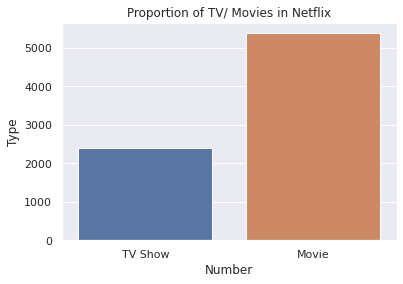

In [105]:
# plotting the tv-movie proportion
sns.countplot(data = df_new, x = 'type')
plt.xlabel('Number')
plt.ylabel('Type')
plt.title('Proportion of TV/ Movies in Netflix');

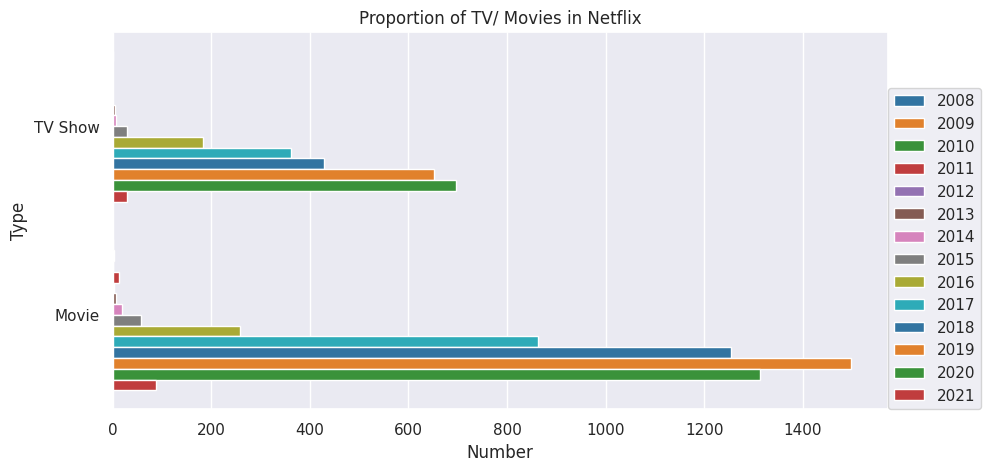

In [106]:
# plotting the tv-movie proportion
plt.figure(figsize = (10,5),dpi = 100)
sns.countplot(data = df_new, y = 'type',hue ='added_year',hue_order = np.arange(2008,2022),palette = 'tab10')
plt.xlabel('Number')
plt.ylabel('Type')
plt.title('Proportion of TV/ Movies in Netflix')
plt.legend(loc= (1,0));

In [107]:
compare  = df_new.groupby(['added_year','type']).count()['show_id'].unstack()

In [108]:
compare

type,Movie,TV Show
added_year,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,13.0,NaN
2012,3.0,NaN
2013,6.0,4.0
2014,19.0,6.0
2015,58.0,30.0
2016,258.0,183.0


In [109]:
compare['Movie per year growth (in percentage)'] = round(compare.Movie.diff()*100 /compare.Movie.shift(1),2)
compare['TV Show per year growth (in percentage)'] = round(compare['TV Show'].diff()*100 /compare['TV Show'].shift(1),2)

In [110]:
compare

type,Movie,TV Show,Movie per year growth (in percentage),TV Show per year growth (in percentage)
added_year,,,,
2008,1.0,1.0,NaN,NaN
2009,2.0,NaN,100.00,NaN
2010,1.0,NaN,-50.00,NaN
2011,13.0,NaN,1200.00,NaN
2012,3.0,NaN,-76.92,NaN
2013,6.0,4.0,100.00,NaN
2014,19.0,6.0,216.67,50.00
2015,58.0,30.0,205.26,400.00
2016,258.0,183.0,344.83,510.00


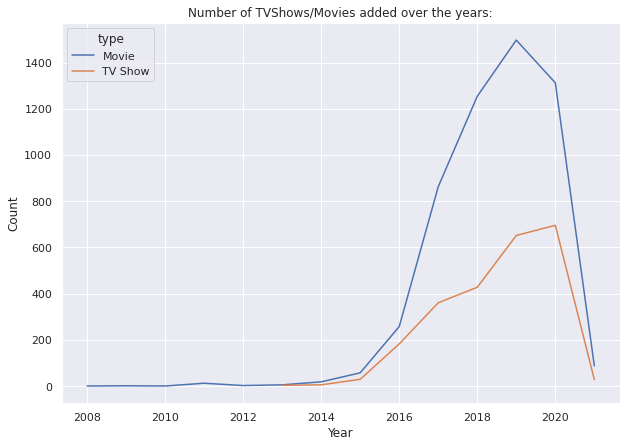

In [111]:
compare[['Movie','TV Show']].plot(figsize = (10,7))
plt.title('Number of TVShows/Movies added over the years:')
plt.xlabel('Year')
plt.ylabel('Count');

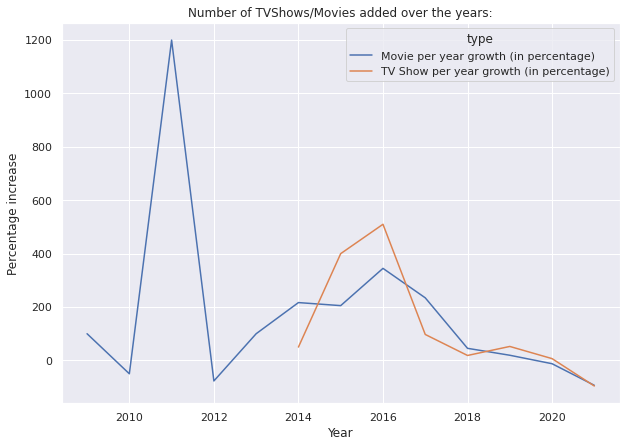

In [113]:
compare[['Movie per year growth (in percentage)','TV Show per year growth (in percentage)']].plot(figsize = (10,7))
plt.title('Number of TVShows/Movies added over the years:')
plt.xlabel('Year')
plt.ylabel('Percentage increase');

# Observations:
1. In 2010-2011, the number of movies added to Netflix was increasing at greater pace, but starts decreasing after that or increase at lower pace.

2. Year 2014-2016 were good for TV shows.

# Countries:

In [115]:
import re

In [116]:
df_new.loc[df_new['country'].notnull(),'country']= df_new.loc[df_new['country'].notnull(),'country'].apply(lambda x: re.split(',\s*',x))
df_new.loc[df_new['cast'].notnull(),'cast']= df_new.loc[df_new['cast'].notnull(),'cast'].apply(lambda x: re.split(',\s*',x))
df_new.loc[df_new['director'].notnull(),'director']= df_new.loc[df_new['director'].notnull(),'director'].apply(lambda x: re.split(',\s*',x))
df_new.loc[df_new['listed_in'].notnull(),'listed_in']= df_new.loc[df_new['listed_in'].notnull(),'listed_in'].apply(lambda x: re.split(',\s*',x))

In [117]:
countries = []
for x in df_new['country'].dropna():
  for country in x:
    if country not in countries:
      countries.append(country)

In [118]:
genre_list = []
for x in df_new['listed_in'].dropna():
  for genre in x:
    if genre not in genre_list:
      genre_list.append(genre)

In [119]:
# Checking if there is mispelt form of country:
sorted(countries)

['',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Nigeria',
 'Norway',
 'Pakistan',
 'Panama',
 'Paraguay',
 'Peru',
 'Phil

In [120]:
countries.remove("")

In [132]:
countries.sort()

In [133]:
genre_list.sort()

In [126]:
len(countries)

117

In [125]:
len(genre_list)

42

In [122]:
sorted(genre_list)

['Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers']

In [130]:
df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,TV Show,3%,NaN,"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],2020-08-14,2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],2016-12-23,2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore],2018-12-20,2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,[Shane Acker],"[Elijah Wood, John C. Reilly, Jennifer Connell...",[United States],2017-11-16,2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,[Robert Luketic],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",[United States],2020-01-01,2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...,2020


In [131]:
len(df_new)

7765

In [ ]:
def to_dict(X):
  

In [ ]:
# Countries DataFrame:
country_df['country']= df_new['country']


#Directors:

In [ ]:
df_new['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4046, dtype: int64

Clearly there are some entries with more than 1 directors.

In [ ]:
df['director'].isnull().sum()

2389

In [ ]:
director_df = pd.DataFrame(df['director'].dropna().apply(lambda x: x.split(",")) )

In [ ]:
director_df

,director
1,[Jorge Michel Grau]
2,[Gilbert Chan]
3,[Shane Acker]
4,[Robert Luketic]
5,[Serdar Akar]
...,...
7780,[Shlok Sharma]
7781,[Peter Hewitt]
7782,[Josef Fares]
7783,[Mozez Singh]


In [ ]:
director_df['number'] = director_df['director'].apply(len)

In [ ]:
director_df.sort_values('number', ascending =False)

,director,number
7470,"[Chris Buck, Jennifer Lee, Patrick Osborne, ...",13
2585,"[Shinji Aramaki, Mamoru Oshii, Hideki Futamu...",12
4244,"[Peter Farrelly, Will Graham, Steve Carr, G...",12
5620,"[Nuhash Humayun, Syed Ahmed Shawki, Rahat Ra...",11
7684,"[Hemant Gaba, Pratim D. Gupta, Sudhish Kamat...",11
...,...,...
2721,[Shawn Arranha],1
2718,[Stacia Crawford],1
2717,[Timothy Woodward Jr.],1
2711,[Madhur Bhandarkar],1
